<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p3/blob/milestone3code/notebooks/group_1_project_et.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1 Project

In [1]:
#@title Data Source
datafile = "./data-sample-clean-20K.csv" #@param {type:"string"}

In [2]:
import pandas as pd

# Load the pre-processed data into the df_features dataframe
df = pd.read_csv(datafile, sep=',')
print(f"Dataset '{datafile}' contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

Dataset './data-sample-clean-20K.csv' contains 7171 row(s) and 274 column(s).


## 1. Classification without PyCaret

In [3]:
# Make a copy of the dataset
df_without_pycaret = df.copy()

In [4]:
df_without_pycaret.describe()

,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,nb_title_entities,nb_text_entities,bank_of_america,wells_fargo,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
count,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,...,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000,7171.000000
mean,3.140148,0.752754,0.746758,0.857900,0.008646,25.724306,0.170548,1.303584,0.001534,0.000837,...,0.031097,0.031097,0.100683,0.048529,0.030540,0.029982,0.041417,0.047134,0.022870,0.029842
std,6.638001,0.431441,0.434899,0.349177,0.092587,14.853614,0.384211,1.332676,0.039138,0.028916,...,0.173593,0.173593,0.316295,0.214896,0.172079,0.170549,0.200661,0.211941,0.157672,0.171796
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,0.000000,21.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,0.000000,34.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,230.000000,1.000000,1.000000,1.000000,1.000000,70.000000,2.000000,15.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000


In [5]:
df_without_pycaret.isnull().sum()

title_clean         0
img_count           0
has_form            0
has_login_form      0
has_js              0
                   ..
view shared file    0
webmail login       0
webmail mini        0
webmail service     0
webmail welcome     0
Length: 274, dtype: int64

In [6]:
df_without_pycaret

,title_clean,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,nb_title_entities,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
0,one drive,1,0,0,1,0,31,one drive read document please choose email pr...,malicious,0.0,...,0,0,0,0,1,1,0,0,0,0
1,email security : : user account,0,1,1,1,0,19,email security user account verification neede...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
2,sign in to your account,4,1,1,0,0,14,sign account nobody mycraftmail.com enter pass...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
3,worldclient,2,1,1,1,0,13,worldclient microsoft office verification port...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
4,plantronics manager,0,1,1,1,0,18,plantronics manager 2019 plantronics inc. righ...,malicious,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7166,safeway wine & spirit and sobeys liquor - prin...,1,1,0,1,0,7,safeway wine spirit sobeys liquor print coupon,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7167,update email address,2,0,0,0,0,36,update email address hello thanks taking time ...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7168,"educalingo , the dictionary for curious people",144,0,0,1,0,23,educalingo dictionary curious people search c ...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0
7169,my - yahoo ! -,2,1,0,1,0,23,yahoo yahoo yahoo japan lowya paypay lowya pay...,benign,0.0,...,0,0,0,0,0,0,0,0,0,0


### Required Imports and methods

In [7]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import matplotlib.pyplot as plt

In [9]:
from sklearn.metrics import classification_report

def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [10]:
# Handling Non-Numerical Data for Machine Learning
# https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/

import numpy as np

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [11]:
train_sizes = [1, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 5736]

In [12]:
### Bundling our previous work into a function ###
def learning_curves(estimator, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, 
    features, 
    target, 
    train_sizes = train_sizes,
    cv = cv, 
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,0.4)

### Plotting the two learning curves ###

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsRegressor

plt.figure(figsize = (16,5))

<Figure size 1600x500 with 0 Axes>

<Figure size 1600x500 with 0 Axes>

### Balance the Data

Text(0, 0.5, 'Count')

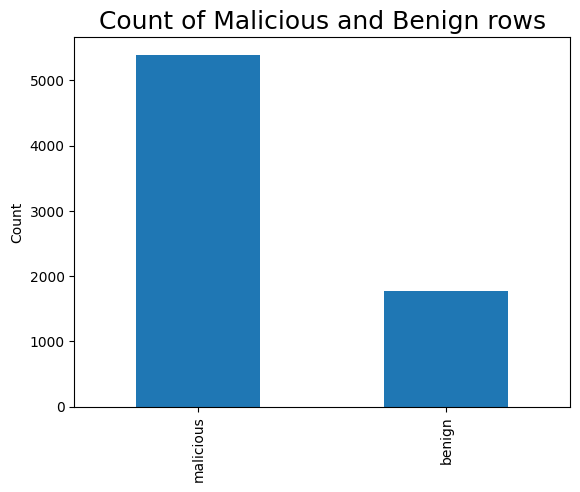

In [13]:
# Assume "df_features" is your DataFrame object
classification_counts = df_without_pycaret['classification'].value_counts()

# Plot the histogram
classification_counts.plot(kind='bar')
plt.title("Count of Malicious and Benign rows", fontsize=18)
plt.ylabel("Count")

#### Resampling strategies for imbalanced datasets

In [14]:
# Class count
count_class_0, count_class_1 = df_without_pycaret.classification.value_counts()

# Divide by class
df_class_0 = df_without_pycaret[df_without_pycaret['classification'] == 'malicious']
df_class_1 = df_without_pycaret[df_without_pycaret['classification'] == 'benign']

#### Random over-sampling

Random over-sampling:
malicious    5396
benign       5396
Name: classification, dtype: int64


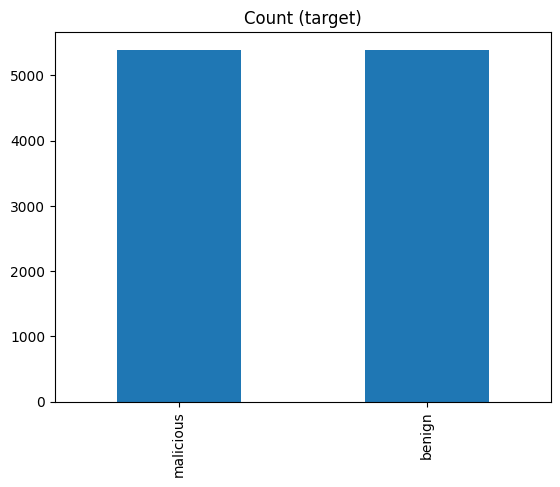

In [15]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.classification.value_counts())

df_test_over.classification.value_counts().plot(kind='bar', title='Count (target)');

### Convert non-numeric features to numeric

In [16]:
# Convert classification to numeric (malicious = 1, benign = 0)
df_without_pycaret['classification'] = df_without_pycaret['classification'].map({'benign':0,'malicious':1})
df_without_pycaret.head()

,title_clean,img_count,has_form,has_login_form,has_js,js_include_b64,nb_tokens,text_clean,classification,nb_title_entities,...,unt sign,unt sign privacy,username password,username password webmail,view shared,view shared file,webmail login,webmail mini,webmail service,webmail welcome
0,one drive,1,0,0,1,0,31,one drive read document please choose email pr...,1,0.0,...,0,0,0,0,1,1,0,0,0,0
1,email security : : user account,0,1,1,1,0,19,email security user account verification neede...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,sign in to your account,4,1,1,0,0,14,sign account nobody mycraftmail.com enter pass...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,worldclient,2,1,1,1,0,13,worldclient microsoft office verification port...,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,plantronics manager,0,1,1,1,0,18,plantronics manager 2019 plantronics inc. righ...,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Convert non-numerical data to numeric
df_without_pycaret = handle_non_numerical_data(df_without_pycaret)
print(df_without_pycaret.head())

   title_clean  img_count  has_form  has_login_form  has_js  js_include_b64  \
0          977          1         0               0       1               0   
1          540          0         1               1       1               0   
2          562          4         1               1       0               0   
3          945          2         1               1       1               0   
4          424          0         1               1       1               0   

   nb_tokens  text_clean  classification  nb_title_entities  ...  unt sign  \
0         31        2136               1                0.0  ...         0   
1         19         216               1                0.0  ...         0   
2         14        2564               1                0.0  ...         0   
3         13        1481               1                0.0  ...         0   
4         18        2478               1                0.0  ...         0   

   unt sign privacy  username password  username passwor

### Classification with Extra Trees

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from numpy import *
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret.drop('classification', axis=1) 
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier model
random.seed(1234)
et = ExtraTreesClassifier()

# Train the model
t0 = time.time()
et.fit(X_train, y_train)
print("Original Model")
print("Training time:", time.time() - t0)

# Predict Class Probabilities
y_et_proba = et.predict_proba(X_test)
y_et_pred = np.where(y_et_proba[:,1] > 0.5, 1, 0)

# Predict the classes for testing data
y_pred = et.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", et.score(X_train, y_train))
print("Validation Accuracy :", et.score(X_test, y_test))

# We create a second et model to validate if we can replicate results
validate_et = ExtraTreesClassifier(random_state = random.seed(1234))

# Train the model
t2 = time.time()
validate_et.fit(X_train, y_train)
print("\nValidation Model")
print("Training time:", time.time() - t2)

# Evaluate the model's performance
print("Training Accuracy :", validate_et.score(X_train, y_train))
print("Validation Accuracy :", validate_et.score(X_test, y_test))

Original Model
Training time: 1.6194720268249512
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9393728222996516

Validation Model
Training time: 1.4619169235229492
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9393728222996516


#### Visualize individual decision tress from a random forest.

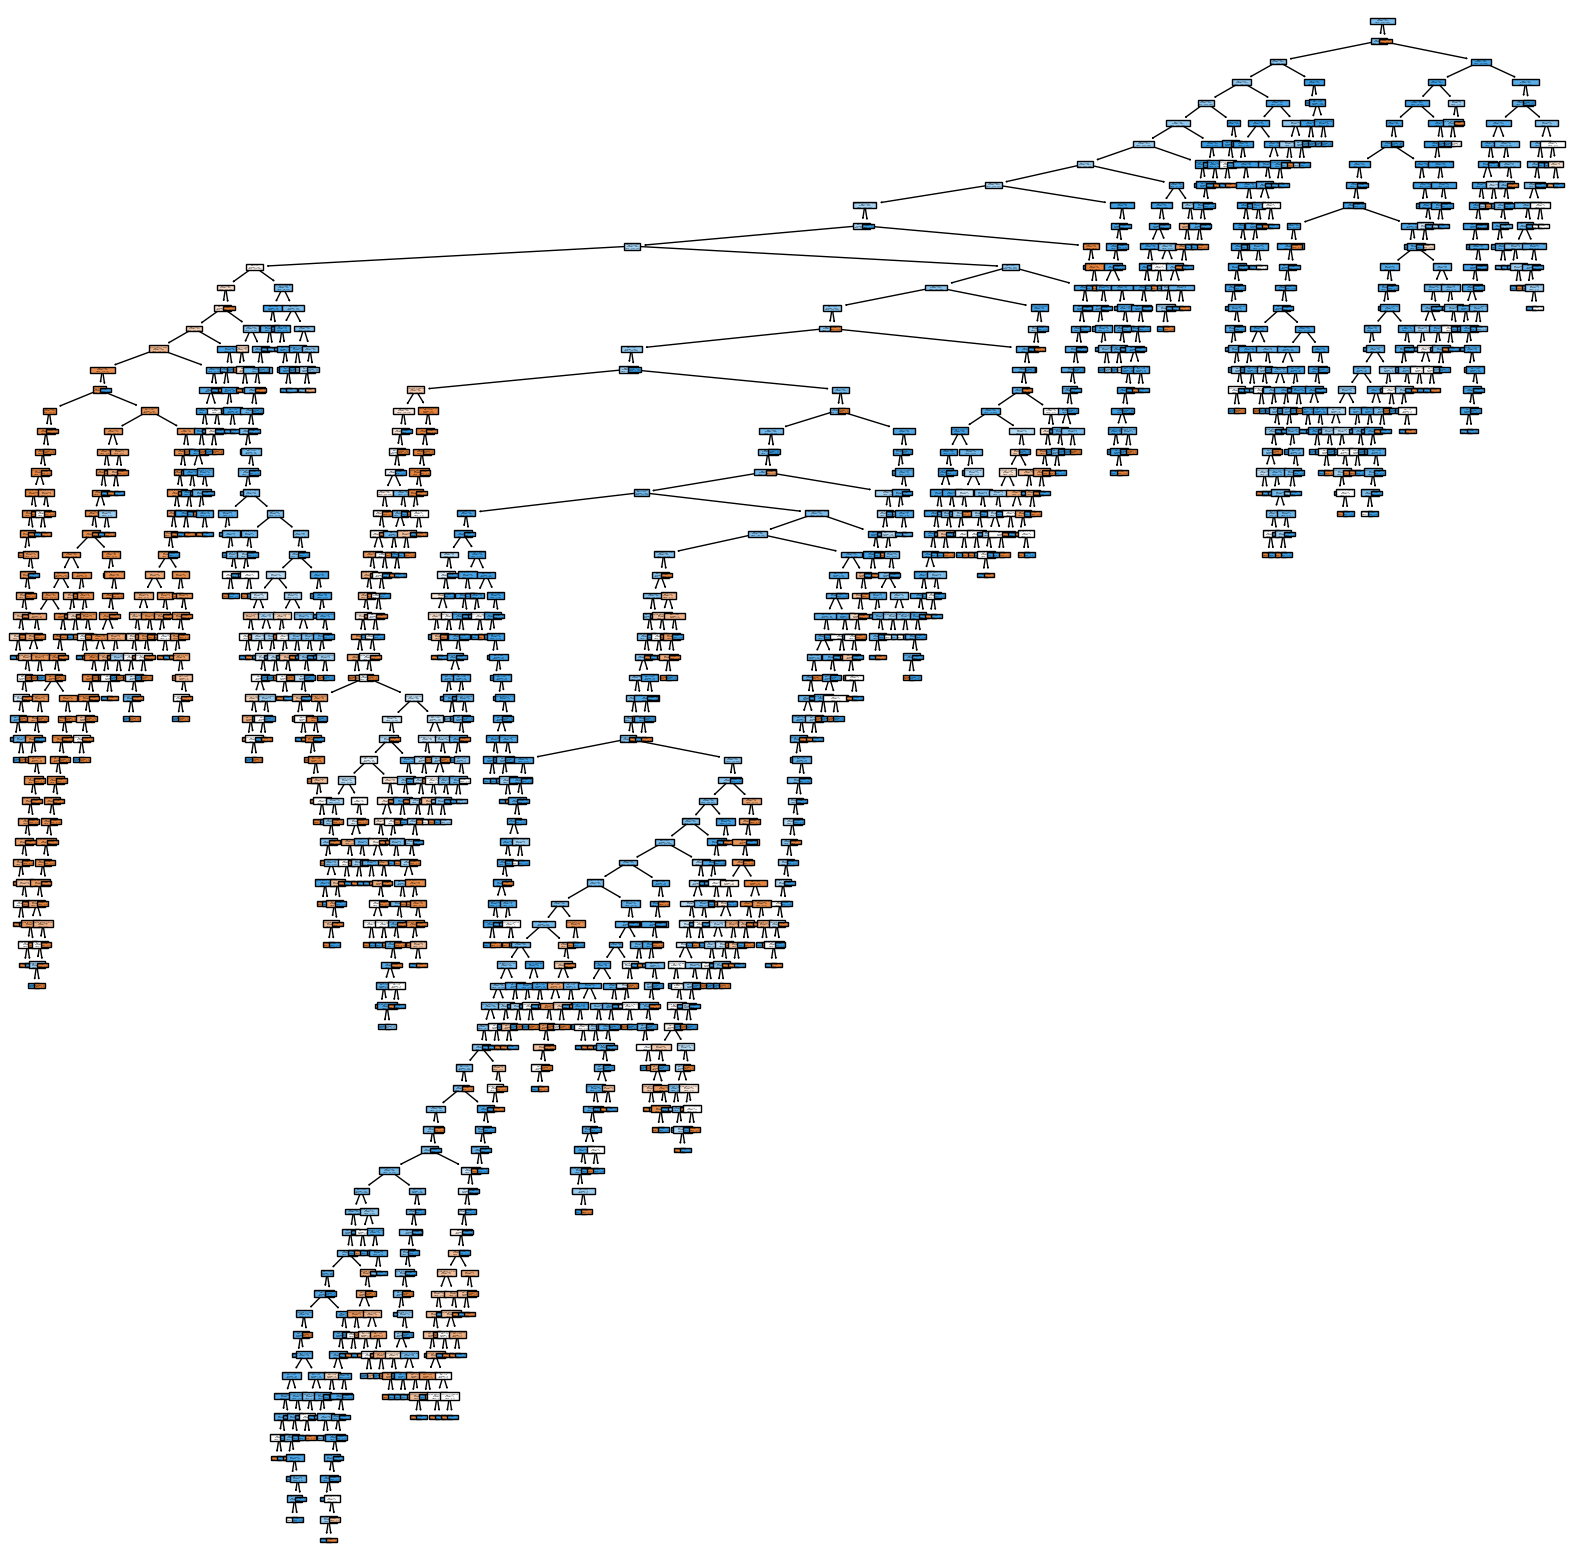

In [21]:
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(et.estimators_[0], feature_names=X.columns, filled=True)

#### Get feature importance

Summary of Feature Importance:
title_clean: Score: 0.04468
img_count: Score: 0.04242
has_form: Score: 0.03854
has_login_form: Score: 0.15833
has_js: Score: 0.01240
js_include_b64: Score: 0.00160
nb_tokens: Score: 0.05044
text_clean: Score: 0.07022
nb_title_entities: Score: 0.01461
nb_text_entities: Score: 0.02948
bank_of_america: Score: 0.00045
wells_fargo: Score: 0.00100
citibank: Score: 0.00000
apple: Score: 0.00378
microsoft: Score: 0.01147
amazon: Score: 0.00360
google: Score: 0.00498
facebook: Score: 0.00069
dhl: Score: 0.00000
youtube: Score: 0.00000
whatsapp: Score: 0.00003
linkedin: Score: 0.00025
twitter: Score: 0.00027
access account: Score: 0.00282
account account: Score: 0.00171
account account create: Score: 0.00027
account another: Score: 0.00010
account another account: Score: 0.00017
account create: Score: 0.00513
account create one: Score: 0.00195
account doe: Score: 0.00207
account doe n: Score: 0.00077
account enter: Score: 0.00032
account enter password: Score: 0.00

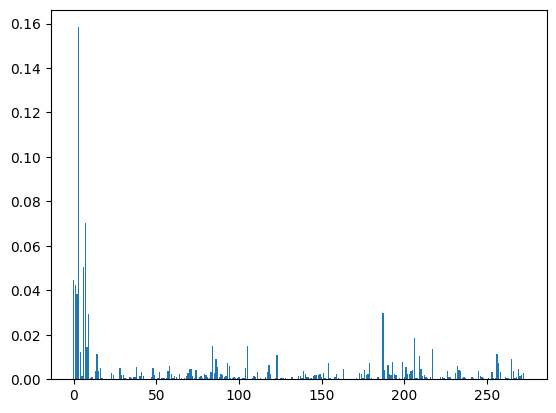

In [22]:
# get importance
importance = et.feature_importances_

# summarize feature importance
print('Summary of Feature Importance:')
for i,v in enumerate(importance):
 print(et.feature_names_in_[i] + ': Score: %.5f' % (v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

We are using k-fold cross-validation method to perform cross-validation. In k-fold cross-validation, you split the input data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time.

In [23]:
# Cross Validation
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [24]:
# Cross Validation Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.936 (0.006)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [25]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.646 (0.098)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

In [26]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.957 (0.005)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [27]:
# Cross Validation Regression MAE
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.063 (0.007)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [28]:
# Cross Validation Regression MSE
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.064 (0.007)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [29]:
# Cross Validation Regression R-squared
scoring = 'r2'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("R2: %.3f (%.3f)" % (results.mean(), results.std()))

R2: 0.656 (0.034)


#### Benchmarking

In [30]:
run_svm(et, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       348
           1       0.96      0.96      0.96      1087

    accuracy                           0.94      1435
   macro avg       0.92      0.92      0.92      1435
weighted avg       0.94      0.94      0.94      1435



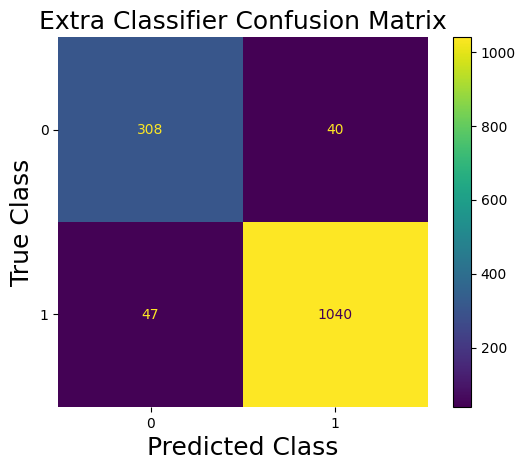

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Extra Classifier Confusion Matrix', fontsize=18)
plt.show()

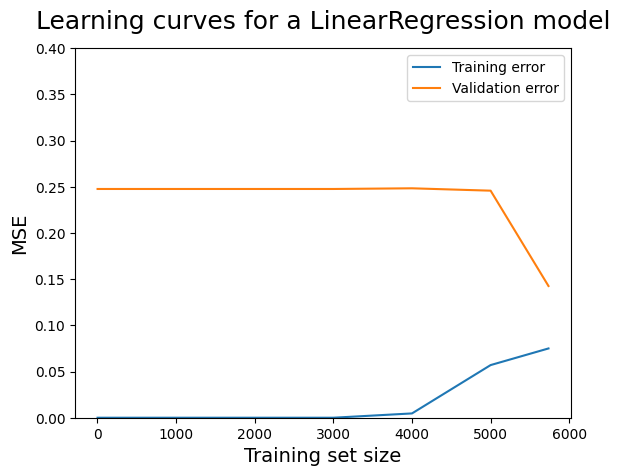

In [32]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Extra Trees'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

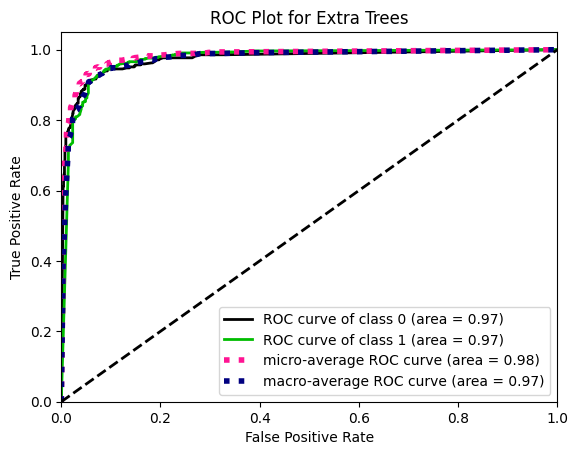

In [33]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_et_proba, title = 'ROC Plot for Extra Trees')

<Axes: title={'center': 'PR Curve for Extra Trees'}, xlabel='Recall', ylabel='Precision'>

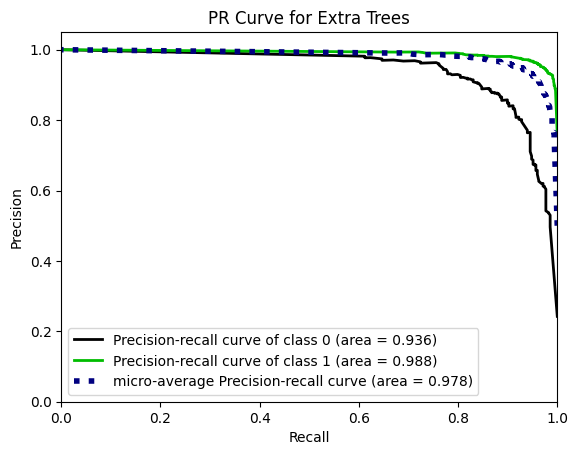

In [34]:
skplt.metrics.plot_precision_recall(y_test, y_et_proba, title = 'PR Curve for Extra Trees')

<Axes: title={'center': 'Cumulative Gains Chart for Extra Trees'}, xlabel='Percentage of sample', ylabel='Gain'>

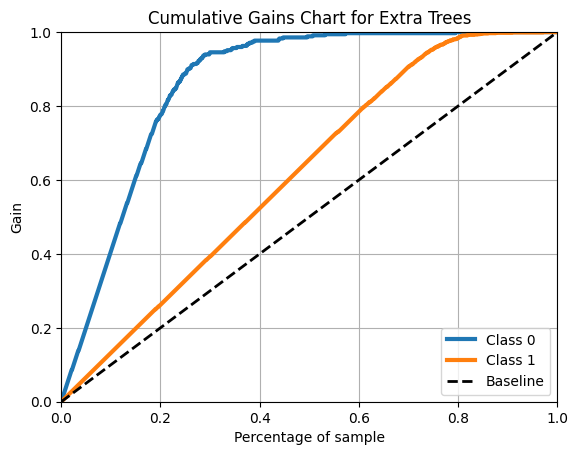

In [35]:
skplt.metrics.plot_cumulative_gain(y_test, y_et_proba, title = 'Cumulative Gains Chart for Extra Trees')

<Axes: title={'center': 'Lift Curve for Extra Trees'}, xlabel='Percentage of sample', ylabel='Lift'>

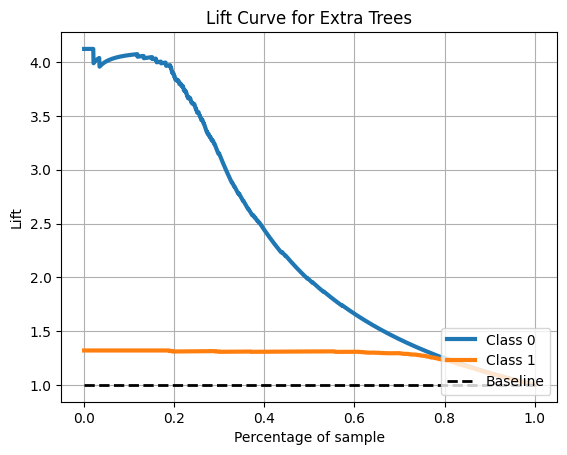

In [36]:
skplt.metrics.plot_lift_curve(y_test, y_et_proba, title = 'Lift Curve for Extra Trees')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [37]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, et.predict_proba(X_test))
logloss

0.38088344712553734

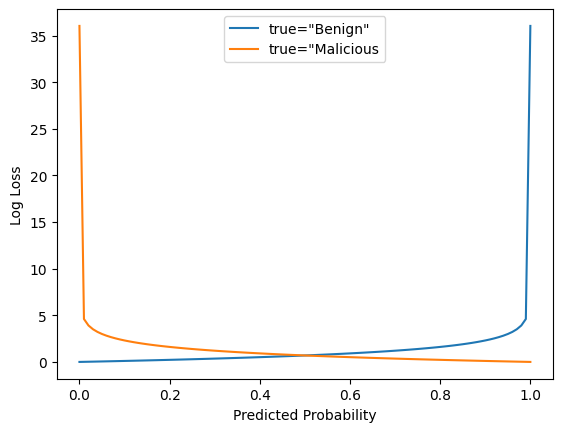

In [38]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

### Feature Reduction
We exclude all features lower than 0.01 importance. By doing so, we have reduced the number of features from 273 to 16.

The remaining features are:

*   title_clean
*   img_count
*   has_form
*   has_login_form
*   has_js
*   nb_tokens
*   text_clean
*   nb_title_entities
*   nb_text_entities
*   microsoft
*   cap lock
*   debtwire login
*   forgot password
*   password remember
*   privacy cooky
*   term privacy cooky



In [63]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import time

# Split the dataframe into feature and target variables
X = df_without_pycaret[['title_clean', 'img_count', 'has_form', 'has_login_form', 'has_js', 'nb_tokens', 'text_clean', 'nb_title_entities', 'nb_text_entities', 'microsoft', 'cap lock',  'debtwire login', 'email address', 'forgot password', 'password remember', 'privacy cooky', 'term privacy cooky']]
y = df_without_pycaret['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ExtraTreesClassifier
rf = ExtraTreesClassifier(random_state = random.seed(1234))

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 0.4412660598754883
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9400696864111499


### Hyperparameter Tuning
We followed the method described by WIll Koehrsen
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.

We performed the following steps:

1.   Use RandomizedSearchCV to get an approximation of the optimal parameters.
2.   Use GridSearchCV to narrow get the optimal parameters.



#### Random Search Cross Validation
Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

We will try adjusting the following set of hyperparameters:
*   **n_estimators** = number of trees in the foreset
*   **max_features** = max number of features considered for splitting a node
*   **max_depth** = max number of levels in each decision tree
*   **min_samples_split** = min number of data points placed in a node before the node is split
*   **min_samples_leaf** = min number of data points allowed in a leaf node
*   **bootstrap** = method for sampling data points (with or without replacement)

#### Random Hyperparameter Grid
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random Search Training
We are selecting at random to sample a wide range of values.

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
et = ExtraTreesRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
et_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

#### View the best parameters from fitting the random search

In [75]:
et_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

#### Create a model with best parameters from Random Search

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import time

# Create a ExtraTreesClassifier
rf = ExtraTreesClassifier(
    n_estimators=1400,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=80,
    bootstrap=False)

# Train the model
t0 = time.time()
et.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Evaluate the model's performance
print("Training Accuracy :", et.score(X_train, y_train))
print("Validation Accuracy :", et.score(X_test, y_test))

Training time: 0.8026096820831299
Training Accuracy : 0.9126611936248883
Validation Accuracy : 0.7316223149106639


#### Perform GridSearchCV
Random search gave us a bad result so we'll provide GridSearchCV a wide range of values. 

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create a ExtraTreesClassifier model
et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [20, 30, 40, 50, 60, 80, 100, 120],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 400, 500, 800, 1000, 1200, 1400]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=et,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

# Train the model
grid_search.fit(X_train, y_train)

grid_search.best_score_

rf_best = grid_search.best_estimator_
rf_best

Fitting 3 folds for each of 216 candidates, totalling 648 fits


ExtraTreesClassifier(max_depth=30, min_samples_leaf=3, n_estimators=400,
                     n_jobs=-1, random_state=42)

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import time

# Create a ExtraTreesClassifier
et = ExtraTreesClassifier(
    n_estimators=400,
    min_samples_leaf=3,
    max_depth=30)

# Train the model
t0 = time.time()
et.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Predict Class Probabilities
y_et_proba = et.predict_proba(X_test)
y_et_pred = np.where(y_et_proba[:,1] > 0.5, 1, 0)

# Predict the classes for testing data
y_pred = et.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", et.score(X_train, y_train))
print("Validation Accuracy :", et.score(X_test, y_test))

Training time: 1.4517767429351807
Training Accuracy : 0.9198047419804742
Validation Accuracy : 0.9184668989547038


Results actually got worse with tuning so we go back to Feature Reduction with default settings

In [100]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
import time

# Create a ExtraTreesClassifier
rf = ExtraTreesClassifier()

# Train the model
t0 = time.time()
rf.fit(X_train, y_train)
print("Training time:", time.time() - t0)

# Predict Class Probabilities
y_et_proba = et.predict_proba(X_test)
y_et_pred = np.where(y_et_proba[:,1] > 0.5, 1, 0)

# Predict the classes for testing data
y_pred = et.predict(X_test)

# Evaluate the model's performance
print("Training Accuracy :", rf.score(X_train, y_train))
print("Validation Accuracy :", rf.score(X_test, y_test))

Training time: 0.4602963924407959
Training Accuracy : 0.9776847977684798
Validation Accuracy : 0.9428571428571428


#### Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

We are using k-fold cross-validation method to perform cross-validation. In k-fold cross-validation, you split the input data into k subsets of data (also known as folds). You train an ML model on all but one (k-1) of the subsets, and then evaluate the model on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time.

In [102]:
# Cross Validation
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [103]:
# Cross Validation Classification Accuracy
scoring = 'accuracy'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.917 (0.008)


Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification). The more the predicted probability diverges from the actual value, the higher is the log-loss value.

In [104]:
# Cross Validation Classification LogLoss
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.239 (0.017)


AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

In [105]:
# Cross Validation Classification ROC AUC
scoring = 'roc_auc'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.951 (0.009)


The Mean Absolute refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

In [106]:
# Cross Validation Regression MAE
scoring = 'neg_mean_absolute_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -0.084 (0.007)


The Mean Squared Error (MSE) is defined as Mean or Average of the square of the difference between actual and estimated values.

In [107]:
# Cross Validation Regression MSE
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -0.083 (0.008)


R-squared is a statistical measure that represents the goodness of fit of a regression model. 

In [108]:
# Cross Validation Regression R-squared
scoring = 'r2'
results = model_selection.cross_val_score(et, X, y, cv=kfold, scoring=scoring)
print("R2: %.3f (%.3f)" % (results.mean(), results.std()))

R2: 0.551 (0.040)


#### Benchmarking

In [109]:
run_svm(et, X_train, y_train, X_test, y_test)


classification_report
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       348
           1       0.93      0.96      0.95      1087

    accuracy                           0.92      1435
   macro avg       0.90      0.88      0.89      1435
weighted avg       0.92      0.92      0.92      1435



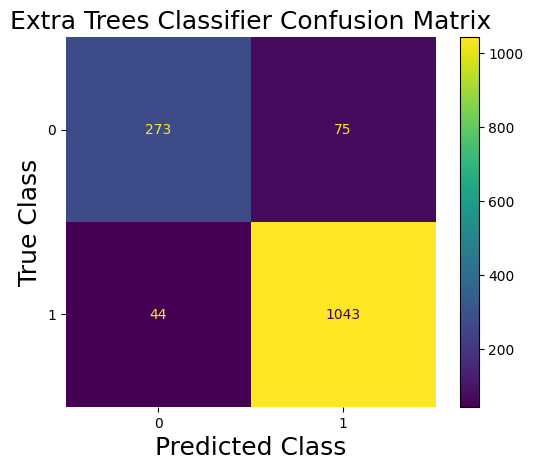

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Extra Trees Classifier Confusion Matrix', fontsize=18)
plt.show()

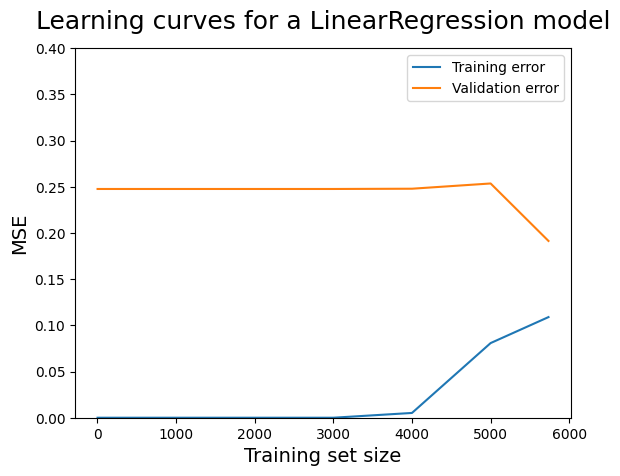

In [111]:
learning_curves(LinearRegression(), X, y, train_sizes, 5)

<Axes: title={'center': 'ROC Plot for Extra Trees'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

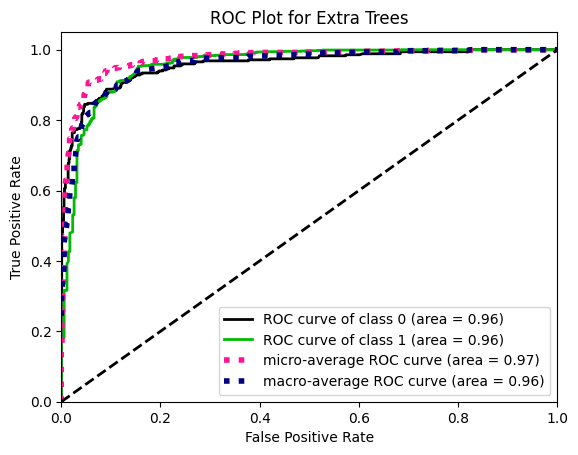

In [89]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, y_et_proba, title = 'ROC Plot for Extra Trees')

<Axes: title={'center': 'PR Curve for Extra Trees'}, xlabel='Recall', ylabel='Precision'>

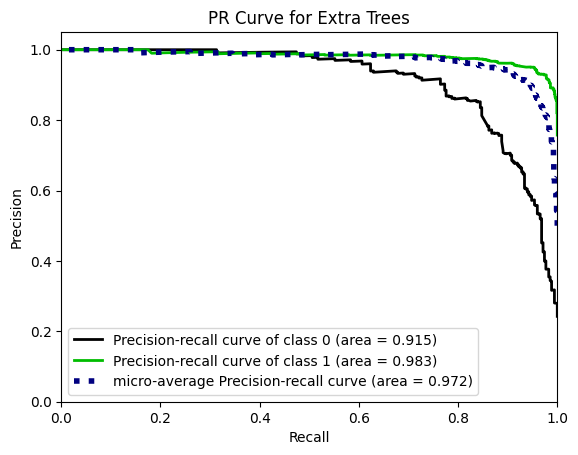

In [90]:
skplt.metrics.plot_precision_recall(y_test, y_et_proba, title = 'PR Curve for Extra Trees')

<Axes: title={'center': 'Cumulative Gains Chart for Extra Trees'}, xlabel='Percentage of sample', ylabel='Gain'>

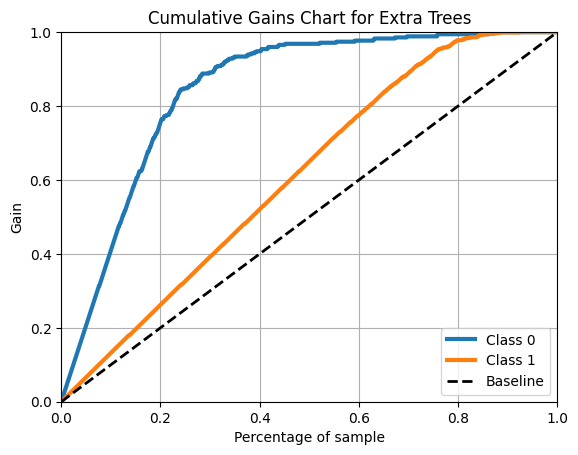

In [91]:
skplt.metrics.plot_cumulative_gain(y_test, y_et_proba, title = 'Cumulative Gains Chart for Extra Trees')

<Axes: title={'center': 'Lift Curve for Trees'}, xlabel='Percentage of sample', ylabel='Lift'>

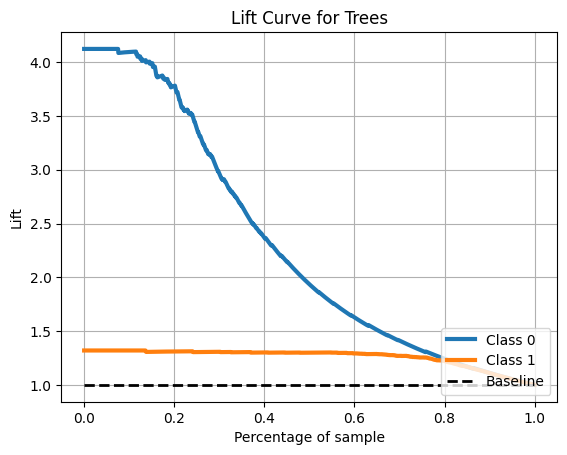

In [92]:
skplt.metrics.plot_lift_curve(y_test, y_et_proba, title = 'Lift Curve for Trees')

Log Loss 
how close the prediction probability is to its corresponding value in binary classification. If the predicted probablity diverges far from the actual then the log-loss value is higher.  

In [93]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, et.predict_proba(X_test))
logloss

0.22972607533429273

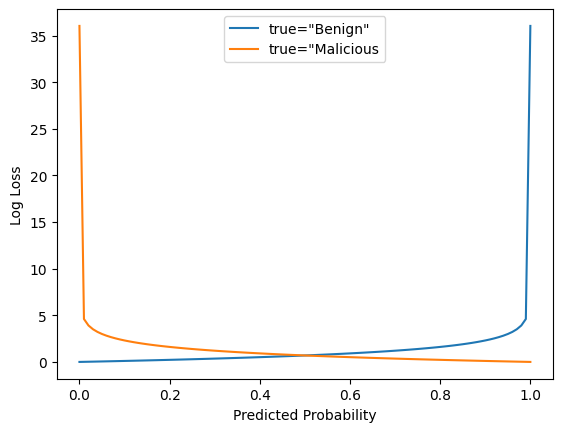

In [112]:
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true="Benign"')
plt.plot(yhat, losses_1, label='true="Malicious')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss')
plt.legend()
plt.show()